In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from math import log10
from numpy import array,pi

# Schematic stellar evolution
The whole of stellar evolution can basically be understood in the following (very) simplified way: stars are spheres of plasma where gravity is balanced by internal pressure sources. During the lives of stars, gravity tries to contract stars while certain pressure sources can temporarily or permanently withstand gravity. 

From the lab on polytropes, we know that the central pressure and density of stars in hydrostatic equilibrium scale according to
\begin{align}
P_\mathrm{c} = B_n \left(\frac{4\pi}{3}\right)^{1/3} G M^{2/3} \rho_\mathrm{c}^{4/3},
\end{align}
where $B_n$ is a constant that depends only on the polytropic index and is of order $0.2\text{--}0.3$. For a star that is dominated by ideal-gas pressure, we have for the central temperature
\begin{align}
T_\mathrm{c} = B_n \left(\frac{4\pi}{3}\right)^{1/3} G M^{2/3} \frac{\mu_\mathrm{c} m_\mathrm{u}}{k_\mathrm{B}} \rho_\mathrm{c}^{1/3}.
\end{align}
So as stars become denser, their cores heat up (not surprising and we knew this already...). For certain (mainly) temperature thresholds, stars can ignite various nuclear burning stages. Nuclear burning then provides the heat to temporarily halt the contraction due to gravity. Whenever a nuclear fuel is exhausted, the star will further contract until the next nuclear burning stage is reached or until another pressure source halts the contraction or something even more drastic such as a supernovae or collapse to a black hole occur. Initially, stars burn hydrogen in their core, followed by helium burning and then burning of heavier elements up to the point when the core is made of iron group elements. At this point, it is impossible to extract energy from nuclear burning (why?) and stars will collapse. The collapse might lead to a successful supernova but can also lead to the collapse to a black hole. The evolution through all these burning stages is only possible for stars beyond a certain mass threshold.

In the equation-of-state lab, you have indicated regions in the $\rho_\mathrm{c}$-$T_\mathrm{c}$ plane where various pressure sources dominate (e.g. ideal-gas, radiative or electron-degeneracy pressure). Here, you will first add to this diagram approximate ignition curves for different nuclear burning stages and then add the approximate evolutionary curve from the above equation of polytropic stars dominated by an ideal gas. This picture will hold the essence of stellar evolution and we will refer to this as 'schematic stellar evolution'.

The following files contain ignition conditions for various nuclear burning stages ($\log \rho$ in first column, $\log T$ in second column):

1. `hydrogen_burn.data`: ignition curve of hydrogen burning
2. `helium_burn.data`: ignition curve of helium burning
3. `carbon_burn.data`: ignition curve of carbon burning
4. `oxygen_burn.data`: ignition curve of oxygen burning

You can load these data into Python via

```
logRho_h, logT_h = np.loadtxt('hydrogen_burn.data', unpack=True)
```

Furthermore, we provide a file, `gamma_4_thirds.data`, that indicates a region in the $\log \rho$-$\log T$ plane where electron-positron pair creation from high energy photons results in an adiabatic exponent of $\gamma\leq4/3$. This indicates a region where stars become pair-unstable. Stars getting there, will likely experience a so-called pair-instability supernova. We will discuss this in later lectures, for now also add this region to your $\log \rho$-$\log T$ diagram.

#### Student-report part 1:
1. Make a plot of the $\rho_\mathrm{c}$-$T_\mathrm{c}$ plane and indicate in which regions which pressure source dominates. Use the results that you have obtained in the equation-of-state lab and also include again the current core conditions of the Sun. *Hint:* For optimal visualisation, we recommended to use plot ranges of $-3\leq\log \rho_\mathrm{c}/\mathrm{cgs}\leq10$ and $5\leq \log T_\mathrm{c}/\mathrm{K}\leq 10$, and to enlarge the plot slightly, e.g. by `plt.figure(figsize=(8,8))`.
2. Add the above ignition curves and the pair-creation area where $\gamma\leq4/3$.
3. Add schematic evolutionary lines for stars of $0.1\,\mathrm{M}_\odot$, $1\,\mathrm{M}_\odot$, $10\,\mathrm{M}_\odot$ and $100\,\mathrm{M}_\odot$. We suggest to use $B_n=0.22$ and the $\mu$ value from the equation-of-state lab. *Hint:* To make the code more readable, you could define a function that adds a stellar track for a given mass.
4. What is roughly the lowest mass such that stars ignite core-hydrogen burning before they enter the electron-degenerate region?

In [2]:
# Your solution here
logRho_h, logT_h = np.loadtxt('hydrogen_burn.data', unpack=True)
logRho_he, logT_he = np.loadtxt('helium_burn.data', unpack=True)
logRho_c, logT_c = np.loadtxt('carbon_burn.data', unpack=True)
logRho_o, logT_o = np.loadtxt('oxygen_burn.data', unpack=True)
logRho_g, logT_g = np.loadtxt('gamma_4_thirds.data', unpack=True)


In [64]:
from math import pi
from astropy.constants import N_A,h,k_B,c,m_e,m_p
from astropy import constants as const
import astropy.units as u
from math import log10

N_A= const.N_A.cgs.value
h=const.h.cgs.value
k_B=const.k_B.cgs.value
c=const.c.cgs.value
m_e=const.m_e.cgs.value
m_p=const.m_p.cgs.value
G=const.G.cgs.value
M_sun = const.M_sun.cgs.value


#u= 1/(1000*N_A)
u=1e-24
mu = (2*0.7+(3/4.0)*0.28+(0.5*0.02))**(-1)
mu_e = 2/(1+0.7)
K_e = h**2/(20*m_e)*(3/pi)**(2./3.)*(1/m_p)**(5./3.)
Bn = 0.22



In [65]:
def T(M):
    tc = (1/3)*logRho+ log10(Bn*(4*pi/3)**(1/3)*G*(M*M_sun)**(2/3)*(mu*u)/(k_B))
    return tc

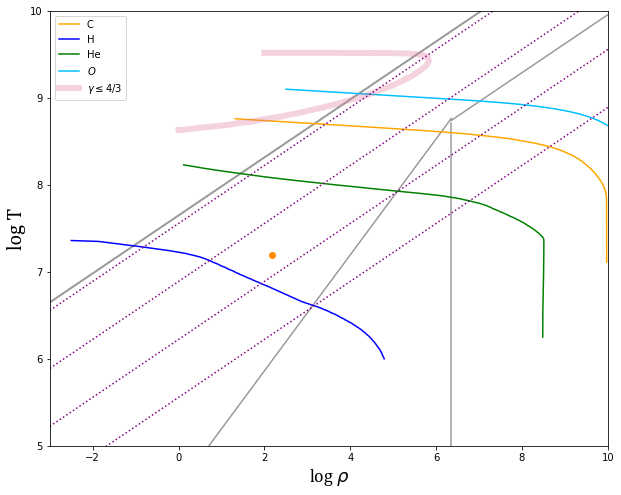

In [95]:
bsfont = {'fontname':'Cambria Math'}



logRho = np.linspace(-3, 10, 10) # sample 5 points between -1 and 10 in log(rho)
logRho2 = np.linspace(-3, 6.352988505302915,10)
logRho3 = np.linspace(6.352988505302915,10,10)
logT1 = (1/3)*logRho+(1/3)*log10((45*h**3*c**3)/(mu*u*8*pi**5*k_B**3))
logT2 = (2/3)*logRho2+log10((h**2)/(20*m_e)*(3/pi)**(2/3)*1/(m_p)**(5/3)*(u*mu)/(k_B*(mu_e)**(5/3)))
logT3 = 1./3.*logRho3+ log10((h*c/8)*(3/pi)**(1/3)*(1/(m_p)**(4/3))*((u*mu)/(k_B*mu_e**(5/3))))
rho = log10(mu_e*(5*c*m_e/(2*h))**3*(pi/3)*m_p)


plt.figure(figsize=(10,8))
bsfont = {'fontname':'Cambria Math'}

plt.plot(logRho, logT1,lw=2,alpha=0.4,color='black')
plt.plot(logRho2,logT2,alpha=0.4,color='black')
plt.plot(logRho3,logT3,alpha=0.4,color='black')
plt.axvline(x=rho,ymax=1/1.347,alpha=0.4,color='black')
plt.plot(logRho_c,logT_c,c='orange',label='C')
plt.plot(logRho_h,logT_h,c='blue',label='H')
plt.plot(logRho_he,logT_he,c='green',label='He')
plt.plot(logRho_o,logT_o,c='deepskyblue',label='$O$')
plt.plot(logRho_g,logT_g,lw=6,alpha=0.3,c='palevioletred',label=r'$\gamma \leq 4/3$')
plt.scatter(log10(150),log10(1.57e7),c='darkorange') ### plotting central temperature density of the sun
plt.plot(logRho,T(0.1),ls=':',c='purple')
plt.plot(logRho,T(1),ls=':',c='purple')
plt.plot(logRho,T(10),ls=':',c='purple')
plt.plot(logRho,T(100),ls=':',c='purple')



plt.ylim(5,10)
plt.xlim(-3,10)
plt.xlabel(r'log $\rho$',fontsize=18,**bsfont)
plt.ylabel('log T',fontsize=20,**bsfont)
plt.legend()


#### Student-report part 2:
Discuss how stars of different mass evolve and what their likely fate is. Explain why some stars will end their life in a region where electron-degeneracy pressure dominates and what will happen to stars that 'miss' this region. In this regard, discuss the role of the Chandrasekhar mass. Where in the $\rho_\mathrm{c}$-$T_\mathrm{c}$ plane are stars that develop a core mass that is beyond the Chandrasekhar mass? Are there any stars that reach the pair-instability region? If so, in which evolutionary stage are these stars, i.e. which elements are they burning in their cores?

Solving these problems will give you a basic understanding of the essence of stellar evolution. In the future MESA labs, we will refine this picture by looking into the details of stars as they evolve. We highly recommend reading chapter 7, "The evolution of stars - a schematic picture", in Dina Prialnik's text book on the "Theory of Stellar Structure and Evolution".